# BGP_Regression_models_11062022

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics 

## A. Checking outcome normality

In [8]:
data=pd.read_csv('BGP_FS_10062022.csv')

### A.1. Dencity plot

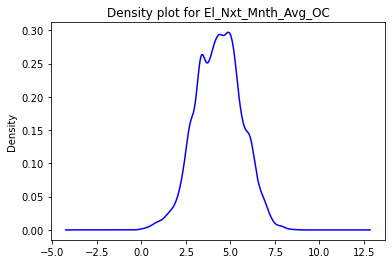

In [9]:
data.El_Nxt_Mnth_Avg_OC.plot.density(color='blue')
plt.title('Density plot for El_Nxt_Mnth_Avg_OC')
plt.show()

### A.2. Shapiro-Wilk normalty test

In [14]:
data1= data.sample(n=500)

In [15]:
# Shapiro-Wilk Test
from numpy.random import seed
from scipy.stats import shapiro
# normality test
stat, p = shapiro(data1.El_Nxt_Mnth_Avg_OC)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.996, p=0.333
Sample looks Gaussian (fail to reject H0)


### A.3 Visualising the proximation of the outcome normality ot absolut normality
####        Q Q or Quantile-Quantile Plot -theoretical quantiles against the actual quantiles of the outcome

C:\Users\shemgulst\0DS13\anaconda\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


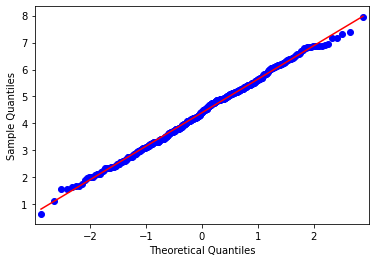

In [16]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(data1.El_Nxt_Mnth_Avg_OC, line='s')
pyplot.show()

## B. Uploading the data
### B.1. Train data

In [23]:
Tr_Da = pd.read_csv("temp_train_11062022.csv")

In [24]:
Tr_Da

,ID,lng,ChWt_Min_W3,ChWt_Min_W4,ChWt_Min_W5,ChWt_AVG_W1,ChWt_STD_W1,Min_seaLvlPressure_W2,Min_seaLvlPressure_W3,Min_seaLvlPressure_W4,...,Avg_seaLvlPressure_W5,Stm_Max_W4.high,Stm_Max_W5.high,Stm_Min_W1.high,Stm_Min_W5.high,Stm_AVG_W1.high,Stm_AVG_W5.high,Stm_STD_W1.high,Stm_STD_W5.high,El_Nxt_Mnth_Avg_OC
0,7677,-74.700000,4.780277,4.888043,5.710857,5.490536,4.906688,6.913240,6.920079,6.918893,...,6.924961,0,0,0,0,0,0,0,0,5.056964
1,9910,-111.928140,0.000000,0.000000,0.000000,6.654466,6.449148,6.913141,6.913936,6.913638,...,6.922738,0,0,0,0,0,0,0,0,2.950513
2,4483,-76.485292,2.982748,3.574077,4.904965,5.748845,5.190721,6.915128,6.918893,6.918596,...,6.924338,0,0,0,0,0,0,0,0,5.074206
3,7557,-81.379039,0.000000,3.248097,3.248097,5.161737,4.734006,6.921362,6.921757,6.919091,...,6.924096,0,0,0,0,0,0,0,0,2.036789
4,2745,-76.485292,4.242062,4.575626,4.526143,4.028224,2.995754,6.907355,6.905553,6.896087,...,6.911593,0,0,0,0,0,0,0,0,6.546848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,2110,-111.928140,0.000000,1.467690,0.116716,2.052654,2.049234,6.922250,6.911150,6.911150,...,6.924457,0,0,0,0,0,0,0,0,0.891873
8213,8038,-76.485292,0.000000,0.000000,0.000000,0.000000,0.000000,6.913936,6.910751,6.920672,...,6.920118,0,0,0,0,0,0,0,0,3.423290
8214,5163,-76.485292,4.813621,5.104022,4.949686,5.667683,4.603751,6.911050,6.905954,6.915327,...,6.920540,0,0,0,0,0,0,0,0,3.709785
8215,7948,-76.485292,3.969471,3.728631,3.745664,4.815767,4.155745,6.911946,6.910551,6.921264,...,6.917697,0,0,0,0,0,0,0,0,4.443155


### B.2 Seperation X y ; variables from outcome

In [25]:
X = Tr_Da.loc[:,(Tr_Da.columns!= 'El_Nxt_Mnth_Avg_OC') ]
y = Tr_Da['El_Nxt_Mnth_Avg_OC']

In [26]:
X

,ID,lng,ChWt_Min_W3,ChWt_Min_W4,ChWt_Min_W5,ChWt_AVG_W1,ChWt_STD_W1,Min_seaLvlPressure_W2,Min_seaLvlPressure_W3,Min_seaLvlPressure_W4,...,Avg_seaLvlPressure_W4,Avg_seaLvlPressure_W5,Stm_Max_W4.high,Stm_Max_W5.high,Stm_Min_W1.high,Stm_Min_W5.high,Stm_AVG_W1.high,Stm_AVG_W5.high,Stm_STD_W1.high,Stm_STD_W5.high
0,7677,-74.700000,4.780277,4.888043,5.710857,5.490536,4.906688,6.913240,6.920079,6.918893,...,6.925509,6.924961,0,0,0,0,0,0,0,0
1,9910,-111.928140,0.000000,0.000000,0.000000,6.654466,6.449148,6.913141,6.913936,6.913638,...,6.920100,6.922738,0,0,0,0,0,0,0,0
2,4483,-76.485292,2.982748,3.574077,4.904965,5.748845,5.190721,6.915128,6.918893,6.918596,...,6.922296,6.924338,0,0,0,0,0,0,0,0
3,7557,-81.379039,0.000000,3.248097,3.248097,5.161737,4.734006,6.921362,6.921757,6.919091,...,6.925730,6.924096,0,0,0,0,0,0,0,0
4,2745,-76.485292,4.242062,4.575626,4.526143,4.028224,2.995754,6.907355,6.905553,6.896087,...,6.920565,6.911593,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,2110,-111.928140,0.000000,1.467690,0.116716,2.052654,2.049234,6.922250,6.911150,6.911150,...,6.925882,6.924457,0,0,0,0,0,0,0,0
8213,8038,-76.485292,0.000000,0.000000,0.000000,0.000000,0.000000,6.913936,6.910751,6.920672,...,6.929664,6.920118,0,0,0,0,0,0,0,0
8214,5163,-76.485292,4.813621,5.104022,4.949686,5.667683,4.603751,6.911050,6.905954,6.915327,...,6.921675,6.920540,0,0,0,0,0,0,0,0
8215,7948,-76.485292,3.969471,3.728631,3.745664,4.815767,4.155745,6.911946,6.910551,6.921264,...,6.930095,6.917697,0,0,0,0,0,0,0,0


In [27]:
y

0       5.056964
1       2.950513
2       5.074206
3       2.036789
4       6.546848
          ...   
8212    0.891873
8213    3.423290
8214    3.709785
8215    4.443155
8216    5.016480
Name: El_Nxt_Mnth_Avg_OC, Length: 8217, dtype: float64

## C. Seting the metrics function to RMSLE

In [19]:
def regressionMetrics(y, yhat):
    res = {
           'RMSLE': np.sqrt(metrics.mean_squared_log_error(y,yhat))
          }
    return res


## D. Supervised Models

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
#from sklearn.neighbors import KNeighborsRegressor # not active becose the data is not divided to X and Y

In [29]:
models_list = pd.DataFrame()

### D.1 Linear Regression - seting the base line

In [30]:
mod1 = LinearRegression()   
mod1.fit(X,y)

pred1 = mod1.predict(X)


In [31]:
regressionMetrics(y, pred1)

{'RMSLE': 0.2373000003886196}

In [15]:
model_dict = {'model': "Linear Regression"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred1)}, ignore_index=True)
models_list

,model,RMSLE
0,Linear Regression,0.2373


C:\Users\shemgulst\0DS13\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='El_Nxt_Mnth_Avg_OC'>

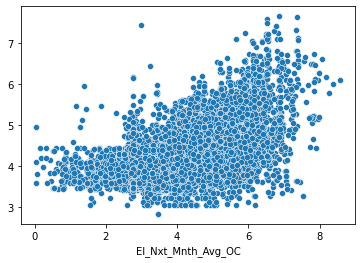

In [16]:
sns.scatterplot(y, pred1)

### D.2. Testing with  Decision Tree model

In [17]:
mod2 = DecisionTreeRegressor(random_state=1)
mod2.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [18]:
pred2 = mod2.predict(X)
model_dict = {'model': "Decision Tree"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred2)}, ignore_index=True)
models_list

,model,RMSLE
0,Linear Regression,2.373000e-01
1,Decision Tree,4.135290e-17


C:\Users\shemgulst\0DS13\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='El_Nxt_Mnth_Avg_OC'>

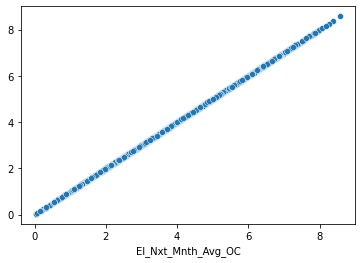

In [19]:
sns.scatterplot(y, pred2)  # over fitting ... not good, not be use

### D.3. Testign with  Random Forest

In [20]:
mod3 = RandomForestRegressor(random_state=1)
mod3.fit(X,y)

RandomForestRegressor(random_state=1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [21]:
pred3 = mod3.predict(X)
model_dict = {'model': "RandomForest"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred3)}, ignore_index=True)
models_list

,model,RMSLE
0,Linear Regression,2.373000e-01
1,Decision Tree,4.135290e-17
2,RandomForest,6.871929e-02


C:\Users\shemgulst\0DS13\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='El_Nxt_Mnth_Avg_OC'>

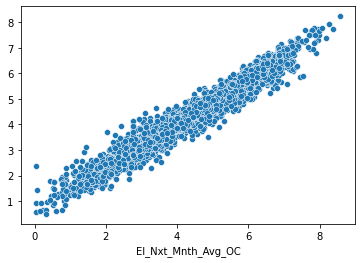

In [22]:
sns.scatterplot(y, pred3)

### D.4. Adaptive Boosting (ADABoost)

In [23]:
mod4 = AdaBoostRegressor(random_state=1)
mod4.fit(X,y)

AdaBoostRegressor(random_state=1)

In [24]:
pred4 = mod4.predict(X)
model_dict = {'model': "ADABoost"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred4)}, ignore_index=True)
models_list

,model,RMSLE
0,Linear Regression,2.373000e-01
1,Decision Tree,4.135290e-17
2,RandomForest,6.871929e-02
3,ADABoost,2.192662e-01


C:\Users\shemgulst\0DS13\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='El_Nxt_Mnth_Avg_OC'>

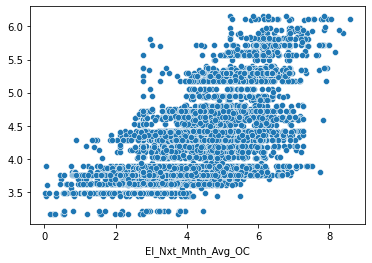

In [25]:
sns.scatterplot(y, pred4)

### D.5. Gradient Boosting Machine (GBM)

In [26]:
mod5 = GradientBoostingRegressor(random_state=1)
mod5.fit(X,y)

GradientBoostingRegressor(random_state=1)

In [27]:
pred5 = mod5.predict(X)
model_dict = {'model': "GBM"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred5)}, ignore_index=True)
models_list

,model,RMSLE
0,Linear Regression,2.373000e-01
1,Decision Tree,4.135290e-17
2,RandomForest,6.871929e-02
3,ADABoost,2.192662e-01
4,GBM,1.892719e-01


C:\Users\shemgulst\0DS13\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='El_Nxt_Mnth_Avg_OC'>

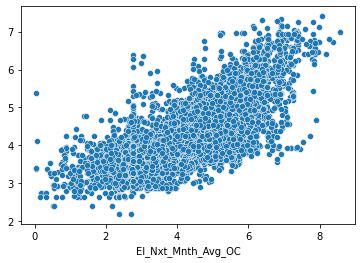

In [28]:
sns.scatterplot(y, pred5)

### D.6. Support Vector Machine (SVM)

In [31]:
mod6 = SVR()
mod6.fit(X,y)

SVR()

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [32]:
pred6 = mod6.predict(X) 
model_dict = {'model': "SVM"}
models_list = models_list.append({**model_dict, **regressionMetrics(y, pred6)}, ignore_index=True)
models_list

,model,RMSLE
0,Linear Regression,2.373000e-01
1,Decision Tree,4.135290e-17
2,RandomForest,6.871929e-02
3,ADABoost,2.192662e-01
4,GBM,1.892719e-01
5,SVM,2.655916e-01
6,SVM,2.655916e-01


C:\Users\shemgulst\0DS13\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='El_Nxt_Mnth_Avg_OC'>

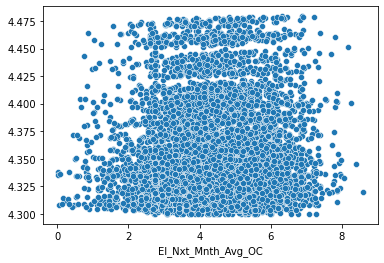

In [33]:
sns.scatterplot(y, pred6)##without Weekend

## E. Model Selection

In [35]:
models_list.sort_values('RMSLE')

,model,RMSLE
1,Decision Tree,4.135290e-17
2,RandomForest,6.871929e-02
4,GBM,1.892719e-01
3,ADABoost,2.192662e-01
0,Linear Regression,2.373000e-01
5,SVM,2.655916e-01
6,SVM,2.655916e-01
